In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
def scrape_stats(base_url, year_start, year_end):
    years = range(year_start,year_end+1,1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'totals_stats'})
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        final_df = final_df.append(df)    
    
    return final_df
    
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'
df = scrape_stats(url, 2015, 2020)

Extraindo ano 2015
Extraindo ano 2016
Extraindo ano 2017
Extraindo ano 2018
Extraindo ano 2019
Extraindo ano 2020


In [4]:
drop_indexes = df[df['Rk'] == 'Rk'].index # Pega indexes onde a coluna 'Rk' possui valor 'Rk'
df.drop(drop_indexes, inplace=True) # elimina os valores dos index passados da tabela

In [5]:
numeric_cols = df.columns.drop(['Player','Pos','Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Year', ylabel='3PA'>

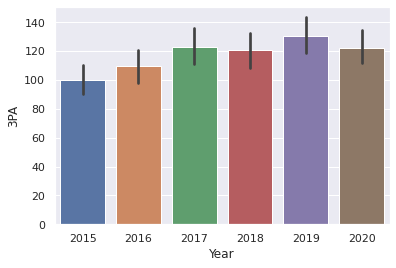

In [13]:
sns.set_theme()
sns.barplot(data=df, x="Year", y="3PA")

<AxesSubplot:xlabel='Year', ylabel='PTS'>

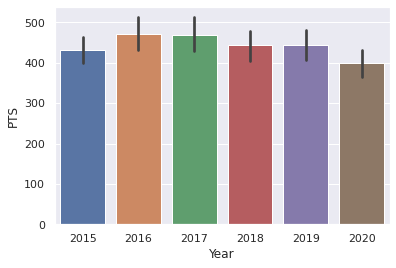

In [14]:
sns.barplot(data=df, x="Year", y="PTS")

In [16]:
df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
count,3274.000000,3274.000000,3274.000000,3274.000000,3274.00000,3274.000000,3274.000000,3258.000000,3274.000000,3274.000000,...,3274.000000,3274.000000,3274.000000,3274.000000,3274.000000,3274.000000,3274.000000,3274.00000,3274.000000,3274.000000
mean,257.850031,26.311240,44.795052,20.544288,1012.94044,163.707086,359.930055,0.438353,41.850641,117.880880,...,42.804215,140.872327,183.676542,97.178986,32.296274,20.104154,57.423946,85.26573,442.182040,2017.566280
std,149.308885,4.179148,26.059660,26.326176,811.08977,159.993028,342.424552,0.108816,51.735726,136.930565,...,52.543935,137.171299,183.301750,120.141567,31.254690,27.084762,58.077352,65.45171,440.327657,1.715845
min,1.000000,19.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2015.000000
25%,128.000000,23.000000,21.000000,0.000000,263.00000,33.000000,75.000000,0.397000,2.000000,9.000000,...,8.000000,31.000000,41.000000,16.000000,7.000000,3.000000,13.000000,25.00000,89.000000,2016.000000
50%,258.000000,26.000000,48.000000,6.000000,859.00000,117.000000,263.500000,0.435500,21.000000,65.500000,...,24.000000,106.000000,133.000000,56.000000,24.000000,11.000000,41.000000,78.00000,312.000000,2018.000000
75%,386.000000,29.000000,69.000000,36.000000,1658.75000,246.750000,545.000000,0.484000,64.000000,186.750000,...,57.000000,208.000000,266.750000,127.750000,48.000000,26.000000,84.000000,135.00000,665.000000,2019.000000
max,540.000000,43.000000,83.000000,82.000000,3125.00000,857.000000,1941.000000,1.000000,402.000000,1028.000000,...,423.000000,848.000000,1247.000000,907.000000,177.000000,269.000000,464.000000,292.00000,2818.000000,2020.000000
